###### Felipe BUZATO FRANÇA COSTA

In [2]:
# Libraries
import numpy as np
import math
from math import factorial as fact
import scipy.stats as stats
import matplotlib.pyplot as plt

## The Cox-Ross-Rubinstein Model

<img src="image.png" alt="drawing" width="300"/>  

1 - Let's consider the $n$-periods binomial model (see the example above with $n = 3$) denoted by the coefficients $S_0 > 0; T > 0$,
<img src="image2.png" alt="drawing2" width="450"/>  
for some given parameters $\sigma > 0$ ; $b > 0$. We denote by ${S_j}^n$ the vector in $R^{j+1}$ of possible prices at time $j$ defined by ${S_j}^n (i)$ := $S_0 u^{j-i} d^i$, $i = 0 , ... , j$.

$(\textit{a})$ Building a function **$Sn(T; n; b; \sigma; j)$** which returns the vector ${S_j}^n$ .

In [57]:
def Sn(T, n, b, sigma, j):
    
    # calculating u and d
    u = math.exp(b*(T/n) + sigma*math.sqrt(T/n))
    d = math.exp(b*(T/n) - sigma*math.sqrt(T/n))
    
    # declaring the vector Snj, which has j+1 elements (possible prices)
    vector = np.zeros(j+1)
    
    # iterating over each state and atributing its value
    S0 = 100
    for i in range(vector.size):
        power_u = j-i
        power_d = i
        vector[i] = S0*(u**(power_u))*(d**(power_d))
    
    return vector

$(\textit{b})$ Suppose we have a European call option with maturity $T$ and strike $K>0$. Let's build a function **$Payoffn(T; n; b; \sigma;K)$** which returns the payoff vector of the option at maturity.

In [58]:
def Payoffn(T, n, b, sigma, K):
    
    # First we need the vector containing all the possible prices at maturity
    prices_mat = Sn(T, n, b, sigma, n)
    
    # Vector that will contain tha payoffs
    payoffs = np.zeros(prices_mat.size)
    for i in range(payoffs.size):
        payoffs[i] = max(0, prices_mat[i]-K)
    
    return payoffs

$(\textit{c})$ Let $r > 0$ be a constant interest rate. Let's build a function **$Calln(T; n; r; b; \sigma; K)$** which returns the price at time zero of the European call option.

The price of the call option, according to the Cox-Ross-Rubinstein model, is the expected value under the risk-neutral mesure (**Q**) of the payoff's present value.

Mesure **Q**: $P(montée) = \frac{R-d_n}{u_n - d_n} $ and $P(descente) = 1- P(montée) $.

In [59]:
def Calln(T, n, r, b, sigma, K):
    discount_factor = math.exp(-(r*T))
    
    # Probability of going up
    u = math.exp(b*(T/n) + sigma*math.sqrt(T/n))
    d = math.exp(b*(T/n) - sigma*math.sqrt(T/n))
    q = (math.exp((T/n)*r)-d)/(u-d)
    
    # Getting the vector of payoffs
    payoffs = Payoffn(T, n, b, sigma, K)
    
    # Calculating the expected value
    expected_val = 0
    for j in range(payoffs.size):
        expected_val += payoffs[j] * (q**j) * ((1-q)**(n-j)) * fact(n)/(fact(j)*fact(n-j)) 

    return discount_factor * expected_val

$(\textit{d})$ At each time ${t_j}^n$ := $j h_n$, denote by ${\theta_j}^n $ the hedging strategy corresponding to the above European option. Let's build a function **$Deltan(T; n; r; b; \sigma;K; j)$** which returns the vector of all values of ${\theta_j}^n$.

The perfect hedging strategy is given by: ${\theta _n}^j(w_j) = \frac{{B_{k+1}}^n (w_k, u_n) - {B_{k+1}}^n (w_k, d_n)}{u_n {S_j}^n (w_j)- d_n {S_j}^n (w_j)}$

In [60]:
def Deltan(T, n, r, b, sigma, K, j):
    
    # Vector containig the prices at time-step j
    prices = Sn(T, n, b, sigma, j)
    
    # Vector containing the possible future payoffs
    payoffs_next = Payoffn(T, j+1, b, sigma, K)
    
    u = math.exp(b*(T/n) + sigma*math.sqrt(T/n))
    d = math.exp(b*(T/n) - sigma*math.sqrt(T/n))
    
    # Vector containing the thetas 
    thetas = np.zeros(prices.size)
    for j in range(thetas.size):
        thetas[j] = (payoffs_next[j] - payoffs_next[j+1])/(u*prices[j] - d*prices[j])
        
    return thetas

$(\textit{e})$ Let's examine the dependence effect of the strike $K$ on the functions **Calln**, **Deltan**. We'll use various values of $K_i = 80+i; i = 0, 1, 2, ... ,40$, a number of periods $n = 50$, and the parameters:
$$
\sigma = 0.3,   r=b=5\%,    S_0 = 100,   T = 2 (years)
$$

In [61]:
# Parameters
sigma = 0.3
b = 0.05
r = 0.05
T = 2
n = 50
K = [1+i for i in range(300)] # Strike prices range from 1 to 301

# Vector that will contain the valutaions of the option, varying the strike K
valuation = np.zeros(len(K)) 

# Matrix that will contain the value of thetas. The matrix has dimensions (len(K), j+1), 
# where j is the time-step chosen to analyse the hedging coefficients. The element (i,k) 
# of the matrix corresponds to the hedging coefficient associated to the striking price 
# K[i] and the price state k.

j = 25 # the thetas calculated will be associated to this time-step
thetas = np.zeros((len(K), j+1))
for i in range(len(K)):
    valuation[i] =  Calln(T, n, r, b, sigma, K[i])
    thetas[i] = Deltan(T, n, r, b, sigma, K[i], j)

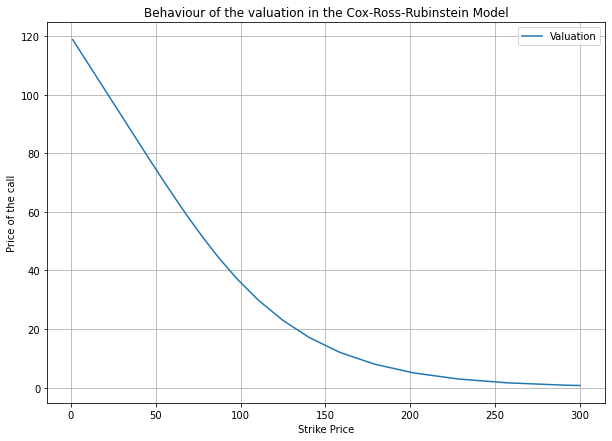

In [62]:
# Lets plot the valuation vector and see its behaviour
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Behaviour of the valuation in the Cox-Ross-Rubinstein Model")
plt.xlabel('Strike Price')
plt.ylabel("Price of the call")
plt.plot(K, valuation, label="Valuation")
plt.legend(loc="best")
ax.grid(True)
plt.show()

As we expected, the price of the option decreases with its strike price. We also verify the convexity on the strike price of the option.

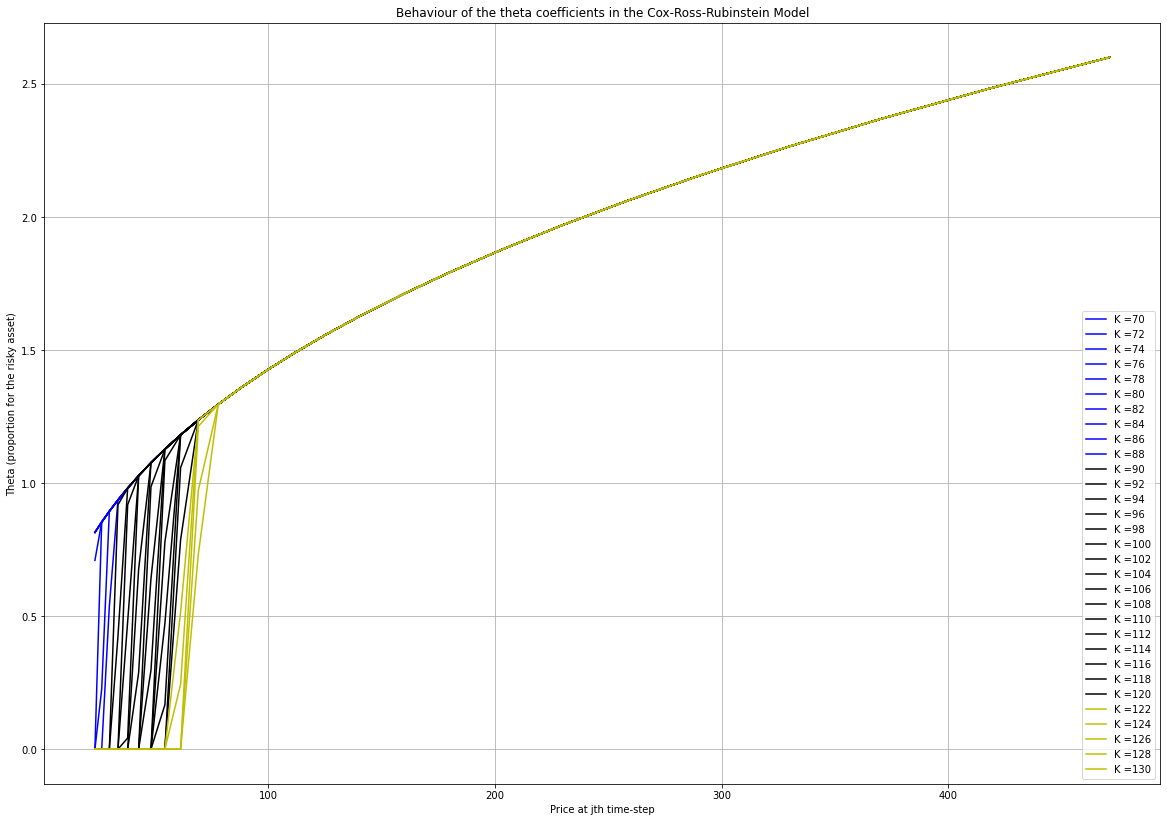

In [63]:
K = [70+i for i in range(61)]
prices_j = Sn(T, n, b, sigma, j)  # Possible price states at jth time-step (this we'll be our x-axis)

# Lets plot the theta hedging coefficients and see its behaviour
fig, ax = plt.subplots(figsize=(20,14))
plt.title("Behaviour of the theta coefficients in the Cox-Ross-Rubinstein Model")
plt.xlabel('Price at jth time-step')
plt.ylabel("Theta (proportion for the risky asset)")
for i in range(len(K)):
    if K[i]%2 == 0:
        if K[i] < 90:
            plt.plot(prices_j, thetas[i], label="K ="+str(K[i]), color='b')
        else: 
            if K[i] > 120:
                plt.plot(prices_j, thetas[i], label="K ="+str(K[i]), color='y')
            else: plt.plot(prices_j, thetas[i], label="K ="+str(K[i]), color='k')
plt.legend(loc="lower right")
ax.grid(True)
plt.show()

What this graph plotted is the distribution of the thetas along the possile prices in a single time step. What we can notice is that the greater the price, the greater the theta, which tells us that the better the price of a risky asset, the more money we want to allocate in it according to the model. 

We can also notice that for some values of $K$, there is a threshold for which if the price is less then this threshold, $theta = 0$, so we don't allocate any money in the risky asset. The values of $K$ that don't have this threshold are low (in the graph we see that most of the blue plots don't go to zero).

Except for this threshold, the value of $K$ seems to have no influence.

2- We now consider the limiting Black-Scholes formula.

$(\textit{a})$ Let's build a function **$Call(T; r; \sigma;K)$** which returns the Black-Scholes price at time zero of the European call option, using the Python function $scipy.stats.norm.cdf$.

The Black-Scholes price for the call option at time zero is given by the expression $p = S_0 N(d_+ (S_0 , K_{present}, \sigma^2 T)) -  K_{present} N(d_- (S_0 , K_{present}, \sigma^2 T)) $, 

where $d_{\pm}(S_0, K, v) = \frac{ln(\frac{S_0}{K})}{\sqrt v} \pm \frac{\sqrt v}{2}  $ and $K_{present} = K e^{-rT} $.

In [64]:
def Call(T, r, sigma, K):
    
    S0 = 100
    K_present = K*math.exp(-r*T) 
    
    d_pos = (math.log(S0/K_present))/math.sqrt((sigma**2)*T) + math.sqrt((sigma**2)*T)/2
    d_neg = (math.log(S0/K_present))/math.sqrt((sigma**2)*T) - math.sqrt((sigma**2)*T)/2
    
    price = S0 * stats.norm.cdf(d_pos) - K_present * stats.norm.cdf(d_neg)
    
    return price

$(\textit{b})$ By defining **$err(T; n; r; b; \sigma;K)$** := **$\frac{Calln(T;n;r;b;\sigma;K)}{Call(T;r;\sigma;K)}$** $- 1$, let's plot the graph of this relative error in terms of the number of periods $n$.

In [65]:
def err(T, n, r, b, sigma, K):
    
    # Price in the discrete Cox-Ross-Rubinstein model
    price_discrete = Calln(T, n, r, b, sigma, K)
    
    # Price in the continuous time-limit model (Black-Scholes price)
    price_continuous = Call(T, r, sigma, K)
        
    return price_discrete/price_continuous - 1

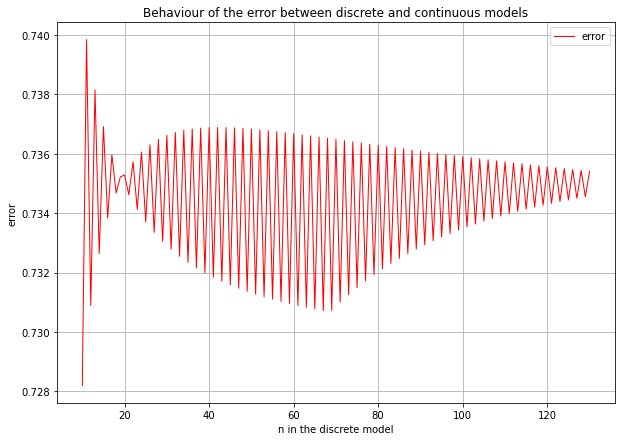

average of the error for n in the range (60:130): 0.7345977596532423


In [66]:
# Lets plot this error and analyse its behaviour
K = 105
n = [10+i for i in range(121)] # n ranges from 10 to 130
errors = np.zeros(len(n)) # vector that will contain the errors for each value of n

for i in range(errors.size):
    errors[i] = err(T, n[i], r, b, sigma, K)
    
# Plotting the graph
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Behaviour of the error between discrete and continuous models")
plt.xlabel('n in the discrete model')
plt.ylabel("error")
plt.plot(n, errors, label="error", linewidth=1.0, color='r')
plt.legend(loc="best")
ax.grid(True)
plt.show()

n2 = list(errors[60:130])
print("average of the error for n in the range (60:130):", sum(n2)/len(n2))

It seems like the error oscilates arround approximately 0.7346, with a decreasing amplitude. 